<a href="https://www.kaggle.com/code/mohamedayman66/new-york-bikeshare?scriptVersionId=108091020" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/new-york-bike-share-system-in-2017/new_york_city.csv


In [2]:
import time
from datetime import *
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl

In [3]:
nyc=pd.read_csv("/kaggle/input/new-york-bike-share-system-in-2017/new_york_city.csv")

In [4]:
nyc.head()

,Unnamed: 0,Start Time,End Time,Trip Duration,Start Station,End Station,User Type,Gender,Birth Year
0,5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998.0
1,4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981.0
2,2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987.0
3,3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986.0
4,6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992.0


In [5]:
nyc.shape

(300000, 9)

In [6]:
nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     300000 non-null  int64  
 1   Start Time     300000 non-null  object 
 2   End Time       300000 non-null  object 
 3   Trip Duration  300000 non-null  int64  
 4   Start Station  300000 non-null  object 
 5   End Station    300000 non-null  object 
 6   User Type      299308 non-null  object 
 7   Gender         270791 non-null  object 
 8   Birth Year     271780 non-null  float64
dtypes: float64(1), int64(2), object(6)
memory usage: 20.6+ MB


**First of all i noticed that first column does not have name so i cant figure out what does this column represent !
but guessing i can think that this column may represent two things either trip number or user id but how can i know ?
maybe user type column can give us a hint**

In [7]:
nyc["User Type"].value_counts()

Subscriber    269149
Customer       30159
Name: User Type, dtype: int64

**As shown there is two type of users either Subscriber or Customer .**

**and this data represent 300k user over six months so logiclly any one of subscriber users could do bike ride atleast 2 time over the six month so if this unknown column shows dublcated values so this column will be user id except that it will be trip number**

In [8]:
nyc["Unnamed: 0"].duplicated().sum()

0

**As shown in the previous cell there is no duplicated values in this column soo obviously this column represent the trip number so i will rename it**

Note:
maybe this column will not help us in our analysis but i loved to show how i knew what this values represent because it could have been useful to us.

In [9]:
nyc.rename(columns={"Unnamed: 0":"Trip Number"},inplace=True)

In [10]:
nyc.head()

,Trip Number,Start Time,End Time,Trip Duration,Start Station,End Station,User Type,Gender,Birth Year
0,5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998.0
1,4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981.0
2,2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987.0
3,3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986.0
4,6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992.0


In [11]:
nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Trip Number    300000 non-null  int64  
 1   Start Time     300000 non-null  object 
 2   End Time       300000 non-null  object 
 3   Trip Duration  300000 non-null  int64  
 4   Start Station  300000 non-null  object 
 5   End Station    300000 non-null  object 
 6   User Type      299308 non-null  object 
 7   Gender         270791 non-null  object 
 8   Birth Year     271780 non-null  float64
dtypes: float64(1), int64(2), object(6)
memory usage: 20.6+ MB


**We can notice here that the data type of starting hour and ending hour it is not a datetime type 
soo we will convert it from string to datetime.**

In [12]:
nyc["Start Time"]=pd.to_datetime(nyc["Start Time"])
nyc["End Time"]=pd.to_datetime(nyc["End Time"])

In [13]:
nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Trip Number    300000 non-null  int64         
 1   Start Time     300000 non-null  datetime64[ns]
 2   End Time       300000 non-null  datetime64[ns]
 3   Trip Duration  300000 non-null  int64         
 4   Start Station  300000 non-null  object        
 5   End Station    300000 non-null  object        
 6   User Type      299308 non-null  object        
 7   Gender         270791 non-null  object        
 8   Birth Year     271780 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(2), object(4)
memory usage: 20.6+ MB


**I think it will be easy for our analysis if we extrct the date,start hour,end hour,number of the month and what day of the week in diffrent column so lets do ot**

**In the cell below we will extract the data from starting time and ending time to make two columns contain the starting and the ending hour of each trip**

In [14]:
start_hour=[]
for i in range(len(nyc["Start Time"])):
    h=int(str(nyc["Start Time"][i].time())[0:2])
    start_hour.append(h)
end_hour=[]
for i in range(len(nyc["Start Time"])):
    h=int(str(nyc["End Time"][i].time())[0:2])
    end_hour.append(h)    
nyc=nyc.assign(Starting_Hour=start_hour)
nyc=nyc.assign(Ending_Hour=end_hour)

In [15]:
nyc.head()

,Trip Number,Start Time,End Time,Trip Duration,Start Station,End Station,User Type,Gender,Birth Year,Starting_Hour,Ending_Hour
0,5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998.0,14,15
1,4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981.0,15,15
2,2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987.0,13,13
3,3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986.0,19,19
4,6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992.0,7,7


**In the cell below we will extract and make columns for:**

1- Number of the month

2- Number of the day in the month 

3- Number of the day through its week (the week starts on monday and end on sunday so if the day was monday its number will be 0 and if it was tuesday the number will be 1 and so on )

In [16]:
nyc["Month"]=nyc["Start Time"].dt.month
nyc["Day to month"]=nyc["Start Time"].dt.day
nyc["Day to week"]=nyc["Start Time"].dt.day_of_week

In [17]:
nyc.head()

,Trip Number,Start Time,End Time,Trip Duration,Start Station,End Station,User Type,Gender,Birth Year,Starting_Hour,Ending_Hour,Month,Day to month,Day to week
0,5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998.0,14,15,6,11,6
1,4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981.0,15,15,5,11,3
2,2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987.0,13,13,3,29,2
3,3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986.0,19,19,5,8,0
4,6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992.0,7,7,6,21,2


**If we look at the trip duration column we will notice that the time calculated in seconds and its kinda confusing and not sensible so i will convert the values to minutes**

In [18]:
nyc["Trip Duration"]=nyc["Trip Duration"]/60
nyc["Trip Duration"]=round(nyc["Trip Duration"])

In [19]:
nyc.head()

,Trip Number,Start Time,End Time,Trip Duration,Start Station,End Station,User Type,Gender,Birth Year,Starting_Hour,Ending_Hour,Month,Day to month,Day to week
0,5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,13.0,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998.0,14,15,6,11,6
1,4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,12.0,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981.0,15,15,5,11,3
2,2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,22.0,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987.0,13,13,3,29,2
3,3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,12.0,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986.0,19,19,5,8,0
4,6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,5.0,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992.0,7,7,6,21,2


In [20]:
nyc.isnull().sum()

Trip Number          0
Start Time           0
End Time             0
Trip Duration        0
Start Station        0
End Station          0
User Type          692
Gender           29209
Birth Year       28220
Starting_Hour        0
Ending_Hour          0
Month                0
Day to month         0
Day to week          0
dtype: int64

In [21]:
nyc.dropna().shape[0]
#show how many rows without nan rows

270102

In [22]:
nyc.dropna().shape[0]/nyc.shape[0]*100
#show the precange of the left row without nan rows

90.034

**We can notice from info funcation that there is missing values in three columns which is Gender,Birth Year and User Type actully i will handel with these values later in another notebook so we will drop any row have nan value especially that we will not remove too mush from the orignal data as shown in the two cells below**

In [23]:
nyc.dropna().shape[0]
#show how many rows without nan rows

270102

In [24]:
nyc.dropna().shape[0]/nyc.shape[0]*100
#show the precange of the left row without nan rows

90.034

In [25]:
nyc=nyc.dropna()
#droping any row have nan value

In [26]:
nyc.head()

,Trip Number,Start Time,End Time,Trip Duration,Start Station,End Station,User Type,Gender,Birth Year,Starting_Hour,Ending_Hour,Month,Day to month,Day to week
0,5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,13.0,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998.0,14,15,6,11,6
1,4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,12.0,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981.0,15,15,5,11,3
2,2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,22.0,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987.0,13,13,3,29,2
3,3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,12.0,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986.0,19,19,5,8,0
4,6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,5.0,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992.0,7,7,6,21,2


In [27]:
nyc["Birth Year"].value_counts()

1989.0    11072
1985.0    10928
1986.0    10922
1988.0    10900
1987.0    10789
          ...  
1930.0        1
1907.0        1
1921.0        1
1935.0        1
1888.0        1
Name: Birth Year, Length: 89, dtype: int64

**Note:**

**when i will deal with birth year column i will deal with it as decades not a single year like forites users ,fifties users and so on untill nineties&2000&2001 users**

**The previous cell shows that there is users their age ninty and above hundred still ride bikes !!**

**it doesnt make any sense for me and i think that maybe the users when they was registering their data they put a random birth year so we will deal with the birth year column to be minimum value in it as 1940 and i will deal with users who less than 1940 by replacing them birth year with in year in the most common decade users born in** 

In [28]:
#this code to know the most common decade users born in through each month

birth_year_populations=[]
birth=[]
birth2=["Forties","Fifties","Sixties","Seventies","Eighties","Nineties & 2000 & 2001"]
l=11
year=1939
for x in range (6):
     for i in range(6):
        if year ==1989:
                l=13   
        j=nyc.loc[(nyc["Month"]==x+1)&(nyc["Birth Year"]>year)&(nyc["Birth Year"]<year+l)]["Birth Year"].value_counts().sum()
        birth.append(j)
        if year ==1989:
            l=13
        year=year+10
        if i==5:
            year=1939
            l=11
            birth_year_populations.append(birth2[birth.index(max(birth))]) 
            birth=[]

In [29]:
#here in this list elemnt with index 0 represent the most common decade users born in through January 
#and the elemnt with index 1 represent the most common decade users born in through Feb and so on...
birth_year_populations

['Eighties', 'Eighties', 'Eighties', 'Eighties', 'Eighties', 'Eighties']

**So obviously eighties decade is the most common decade users born in through the all six months as shown from the previous cell soo i will change the birth year of the users who thier birth year less than 1940 with any year in eighties decade ,1985 for example**

In [30]:
index=nyc[nyc["Birth Year"]<1940.0]["Birth Year"].index
for i in index:
    nyc["Birth Year"][i]=1985.0

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [31]:
nyc["Birth Year"].min()

1940.0

In [32]:
nyc.describe()

,Trip Number,Trip Duration,Birth Year,Starting_Hour,Ending_Hour,Month,Day to month,Day to week
count,2.701020e+05,270102.000000,270102.000000,270102.000000,270102.000000,270102.000000,270102.000000,270102.000000
mean,3.358875e+06,13.330723,1978.303311,13.869483,14.016157,4.030592,15.876421,2.766203
std,1.978655e+06,90.484531,11.696153,4.879355,4.912488,1.678160,8.846807,1.883366
min,3.300000e+01,1.000000,1940.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,1.635615e+06,6.000000,1970.000000,9.000000,10.000000,3.000000,8.000000,1.000000
50%,3.331728e+06,10.000000,1981.000000,15.000000,15.000000,4.000000,16.000000,3.000000
75%,5.081240e+06,16.000000,1988.000000,18.000000,18.000000,5.000000,24.000000,4.000000
max,6.816152e+06,35930.000000,2001.000000,23.000000,23.000000,6.000000,31.000000,6.000000


**I think we now ready for our analysis**

**What is the avg time users spent on their trip through each month?**

In [33]:
avg_time=[]
for i in range(6):
    mo=nyc.loc[(nyc["Month"]==i+1)]["Trip Duration"].mean()
    avg_time.append(mo)

In [34]:
avg_time

[11.529781906832707,
 11.947451981446315,
 11.75264367816092,
 13.537456963077288,
 13.469005788736435,
 15.237875460049864]

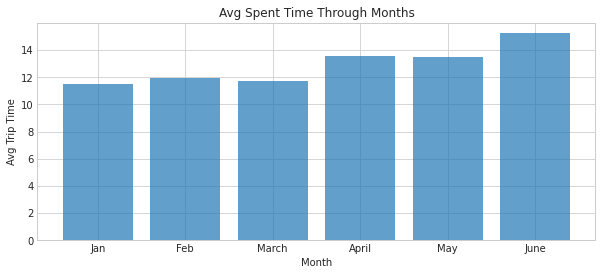

In [35]:
months=["Jan","Feb","March","April","May","June"]
plt.figure(figsize=(10,4))
plt.bar(months,avg_time,alpha=0.7)
plt.xlabel("Month")
plt.ylabel("Avg Trip Time")
plt.title("Avg Spent Time Through Months")
plt.show()

**What is the total time users spent in each month?**

In [36]:
total_time=[]
for i in range(6):
    mo=nyc.loc[(nyc["Month"]==i+1)]["Trip Duration"].sum()
    total_time.append(mo)

In [37]:
total_time

[349975.0, 383788.0, 357868.0, 684156.0, 798079.0, 1026789.0]

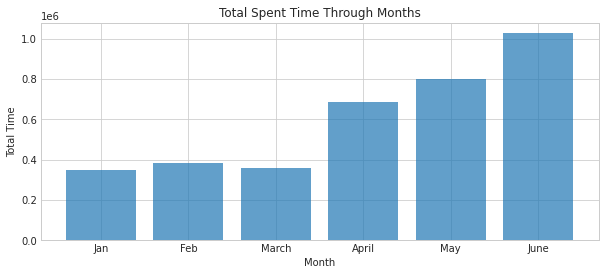

In [38]:
plt.figure(figsize=(10,4))
plt.bar(months,total_time,alpha=0.7)
plt.xlabel("Month")
plt.ylabel("Total Time")
plt.title("Total Spent Time Through Months")
plt.show()

**What is the avg trip time for male and female through each month?**

In [39]:
gender=["Male","Female"]
male1=[]
female1=[]
for i in gender:
    for x in range(6):
        mo=nyc.loc[(nyc["Gender"]==i)&(nyc["Month"]==x+1)]["Trip Duration"].mean()
        if i=="Female":
            female1.append(mo)
        else:
            male1.append(mo)

In [40]:
male1

[11.09399257509281,
 11.392028867985728,
 11.078193133228906,
 12.938813823739391,
 12.896937640462191,
 15.208249456477978]

In [41]:
female1

[13.083157894736843,
 13.784019305536935,
 14.085517645336067,
 15.317477789134365,
 15.126693856071569,
 15.32098486559747]

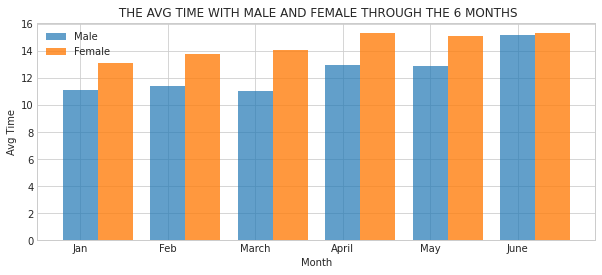

In [42]:
axis=np.arange(len(months))
plt.figure(figsize=(10,4))
plt.bar(axis,male1,0.4,label="Male",alpha=0.7)
plt.bar(axis+0.4,female1,0.4,label="Female",alpha=0.8)
plt.xticks(axis,months)
plt.title(" THE AVG TIME WITH MALE AND FEMALE THROUGH THE 6 MONTHS")
plt.xlabel("Month")
plt.ylabel("Avg Time")
plt.legend()
plt.show()

**What is the avg spent time for subscriber and customer through each month?**

In [43]:
user_type=["Subscriber","Customer"]
customer=[]
subscriber=[]
for i in user_type:
    for x in range(6):
        mo=nyc.loc[(nyc["User Type"]==i)&(nyc["Month"]==x+1)]["Trip Duration"].mean()
        if i=="Customer":
            customer.append(mo)
        else:
            subscriber.append(mo)

In [44]:
customer

[47.25,
 82.05,
 38.55555555555556,
 31.7322206095791,
 25.617952522255194,
 72.04642409033877]

In [45]:
subscriber

[11.510943371349462,
 11.903778463071987,
 11.744719293058704,
 13.027441008950365,
 13.186184267334427,
 13.861483508131935]

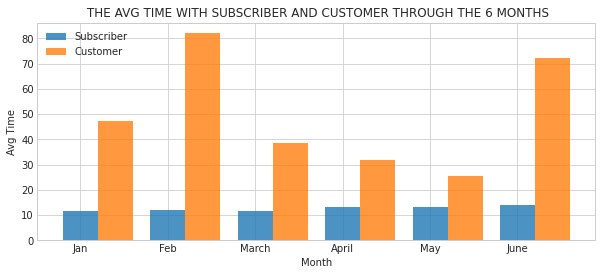

In [46]:
axis=np.arange(len(months))
plt.figure(figsize=(10,4))
plt.bar(axis,subscriber,0.4,label="Subscriber",alpha=0.8)
plt.bar(axis+0.4,customer,0.4,label="Customer",alpha=0.8)
plt.xticks(axis,months)
plt.title(" THE AVG TIME WITH SUBSCRIBER AND CUSTOMER THROUGH THE 6 MONTHS")
plt.xlabel("Month")
plt.ylabel("Avg Time")
plt.legend()
plt.show()

**What is the population of each month?**

In [47]:
months_population=[]
for i in range(6):
    months_population.append(nyc["Month"].value_counts()[i+1]) 
months_population    

[30354, 32123, 30450, 50538, 59253, 67384]

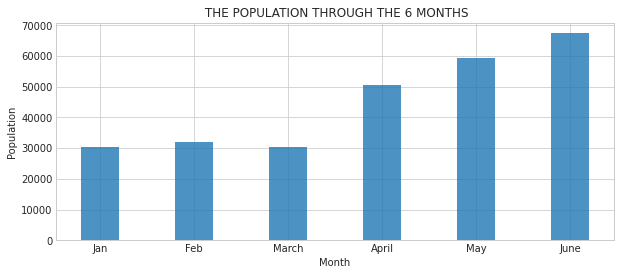

In [48]:
months=["Jan","Feb","March","April","May","June"]
axis=np.arange(len(months))
plt.figure(figsize=(10,4))
plt.bar(months,months_population,0.4,alpha=0.8)
plt.title(" THE POPULATION THROUGH THE 6 MONTHS")
plt.xlabel("Month")
plt.ylabel("Population")
plt.legend()
plt.show()

**What is the male and female population through each month?**

In [49]:
male_population=[]
female_population=[]
for i in gender:
    for x in range(6):
        g= nyc.loc[(nyc["Gender"]==i)]["Month"].value_counts()[x+1]
        if i =="Male":
            male_population.append(g)
        else:
            female_population.append(g)

In [50]:
male_population

[23704, 24664, 23621, 37819, 44051, 49676]

In [51]:
female_population

[6650, 7459, 6829, 12719, 15202, 17708]

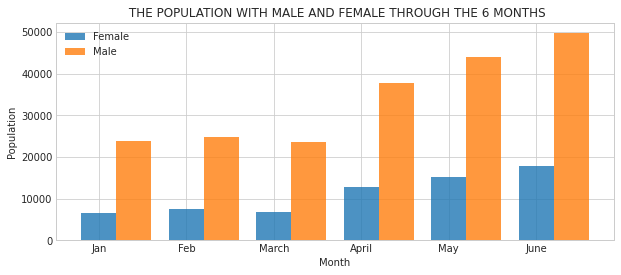

In [52]:
axis=np.arange(len(months))
plt.figure(figsize=(10,4))
plt.bar(axis,female_population,0.4,label="Female",alpha=0.8)
plt.bar(axis+0.4,male_population,0.4,label="Male",alpha=0.8)
plt.xticks(axis,months)
plt.title(" THE POPULATION WITH MALE AND FEMALE THROUGH THE 6 MONTHS")
plt.xlabel("Month")
plt.ylabel("Population")
plt.legend()
plt.show()

**What is the population of costumers and subscribers through each month?**

In [53]:
coustmer_population=[]
supscriber_population=[]
for i in user_type:
    for x in range(6):
        t=nyc.loc[(nyc["User Type"]==i)]["Month"].value_counts()[x+1]
        if i =="Subscriber":
            supscriber_population.append(t)
        else:
            coustmer_population.append(t)

In [54]:
coustmer_population

[16, 20, 9, 1378, 1348, 1594]

In [55]:
supscriber_population

[30338, 32103, 30441, 49160, 57905, 65790]

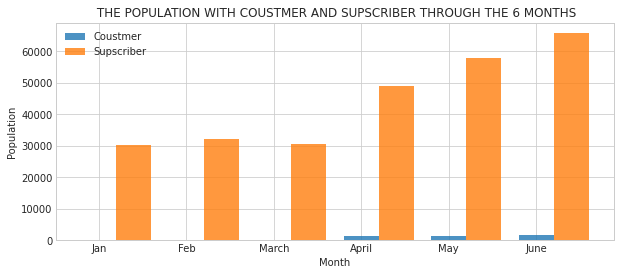

In [56]:
axis=np.arange(len(months))
plt.figure(figsize=(10,4))
plt.bar(axis,coustmer_population,0.4,label="Coustmer",alpha=0.8)
plt.bar(axis+0.4,supscriber_population,0.4,label="Supscriber",alpha=0.8)
plt.xticks(axis,months)
plt.title(" THE POPULATION WITH COUSTMER AND SUPSCRIBER THROUGH THE 6 MONTHS")
plt.xlabel("Month")
plt.ylabel("Population")
plt.legend()
plt.show()

**What is the population of each birth is decades through each month?**

In [57]:
birth3=[]
ll=11
year=1939
for x in range(6):
    for i in range(6):
        if year==1989:
            ll=13
        j=nyc.loc[(nyc["Month"]==x+1)&(nyc["Birth Year"]>year)&(nyc["Birth Year"]<year+ll)]["Birth Year"].value_counts().sum()
        birth3.append(j)
        year=year+10
        if i==5:
            ll=11
            year=1939

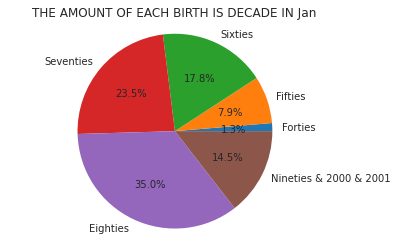

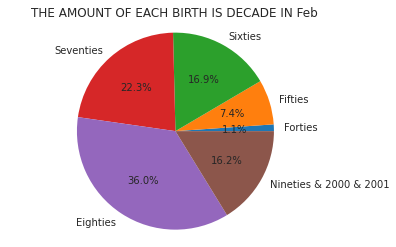

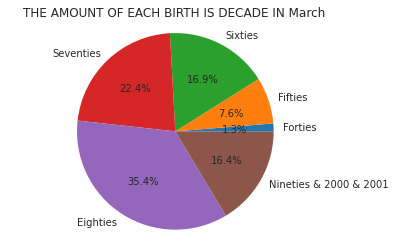

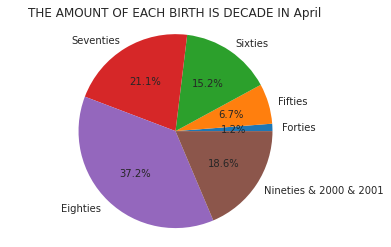

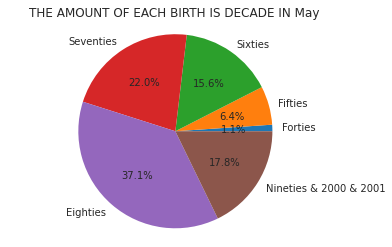

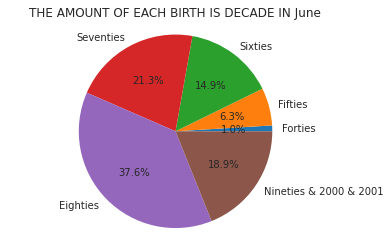

In [58]:
a=0
b=6
for i in range(6):
    plt.pie(birth3[a:b],labels=birth2,autopct='%1.1f%%')
    plt.axis('equal')
    plt.title("THE AMOUNT OF EACH BIRTH IS DECADE IN {}".format(months[i]))
    plt.show()
    a=a+6
    b=b+6

**What is the population of each week in each month?**

In [59]:
week=7
week_list=[]
for x in range (6):
    for i in range(4):
        j=nyc.loc[(nyc["Month"]==x+1)&(nyc["Day to month"]>week-7)&(nyc["Day to month"]<week+1)]["Trip Number"].value_counts().sum()
        week_list.append(j)
        week=week+7
        if i==3:
            week=7

In [60]:
week_list

[5376,
 6889,
 7431,
 7444,
 8216,
 4678,
 8746,
 10483,
 8506,
 6829,
 3588,
 7822,
 9676,
 13133,
 12408,
 11984,
 13350,
 12905,
 15959,
 11599,
 15339,
 16214,
 14618,
 16425]

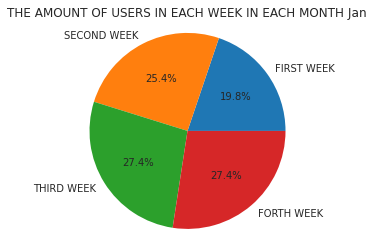

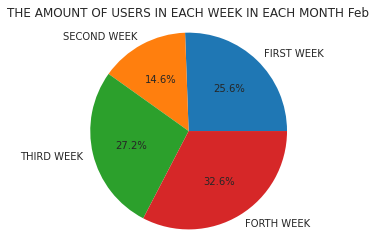

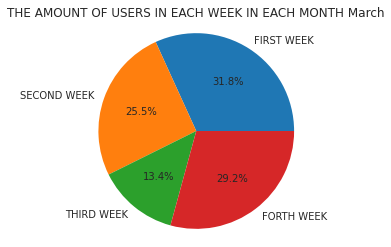

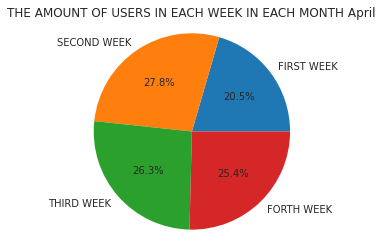

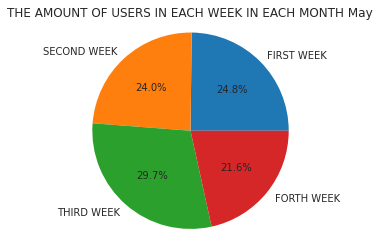

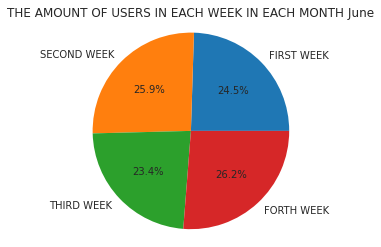

In [61]:
weeks=["FIRST WEEK","SECOND WEEK","THIRD WEEK","FORTH WEEK"]
a=0
b=4
for i in range(6):
    plt.pie(week_list[a:b],labels=weeks,autopct='%1.1f%%')
    plt.axis('equal')
    plt.title("THE AMOUNT OF USERS IN EACH WEEK IN EACH MONTH {}".format(months[i]))
    plt.show()
    a=a+4
    b=b+4

**What is most day was busy (in terms of users)?**

In [62]:
date=[]
for i in range(6):
    r=nyc.loc[(nyc["Month"]==i+1)]["Day to month"].mode()
    if str(r)[6]=="\n":
        date.append(str(r)[5:6]+" "+months[i])
    else:
        date.append(str(r)[5:7]+" "+months[i])

In [63]:
date

['12 Jan', '24 Feb', '9 March', '28 April', '17 May', '28 June']

**What is most day was busy (in terms of time)?**

In [64]:
maxx=0
day_index=0
date2=[]
for i in range(6):
    for x in range(31):
        n=nyc.loc[(nyc["Month"]==i+1)&(nyc["Day to month"]==x+1)]["Trip Duration"].sum()
        if n>maxx:
            maxx=n
            day_index=x+1
        if x==30:  
            date2.append(str(day_index)+" "+months[i])
            maxx=0

In [65]:
date2

['12 Jan', '23 Feb', '30 March', '28 April', '24 May', '13 June']

**What is the most frequented starting and ending hour through each month?**

In [66]:
start_hour=[]
end_hour=[]
for i in range(6):
    m=nyc.loc[(nyc["Month"]==i+1)]["Starting_Hour"].mode()[0]
    b=nyc.loc[(nyc["Month"]==i+1)]["Ending_Hour"].mode()[0]
    if m>=0 and m<12:
        start_hour.append(months[i]+":"+str(m)+" "+"Am")
        end_hour.append(months[i]+":"+str(b)+" "+"Am")
    else:
        start_hour.append(months[i]+":"+str(m)+" "+"Pm")
        end_hour.append(months[i]+":"+str(b)+" "+"Pm")
        


In [67]:
start_hour

['Jan:8 Am',
 'Feb:17 Pm',
 'March:17 Pm',
 'April:17 Pm',
 'May:18 Pm',
 'June:17 Pm']

In [68]:
end_hour

['Jan:8 Am',
 'Feb:18 Pm',
 'March:18 Pm',
 'April:18 Pm',
 'May:18 Pm',
 'June:18 Pm']

**What is most frequented starting and ending station through each month?**

In [69]:
popular_start_stations=[]
popular_end_stations=[]
for i in range(6):
    a=str(nyc.loc[(nyc["Month"]==i+1)]["Start Station"].mode())[5:-14]
    popular_start_stations.append(months[i]+":"+a)
    b=str(nyc.loc[(nyc["Month"]==i+1)]["End Station"].mode())[5:-14]
    popular_end_stations.append(months[i]+":"+b)

In [70]:
popular_start_stations

['Jan:Pershing Square North',
 'Feb:Pershing Square North',
 'March:Pershing Square North',
 'April:Pershing Square North',
 'May:Pershing Square North',
 'June:Pershing Square North']

In [71]:
popular_end_stations

['Jan:Pershing Square North',
 'Feb:Pershing Square North',
 'March:Pershing Square North',
 'April:Pershing Square North',
 'May:Pershing Square North',
 'June:Pershing Square North']

**What is the most common trip through each month?**

In [72]:
stations=[]
for i in range (6):
    x=(nyc.loc[(nyc["Month"]==i+1)]["Start Station"])+"**"+(nyc.loc[(nyc["Month"]==i+1)]["End Station"])
    stations.append(months[i]+":"+"FROM "+x.mode()[0].split("**")[0]+" TO "+x.mode()[0].split("**")[1])

In [73]:
stations

['Jan:FROM E 7 St & Avenue A TO Cooper Square & E 7 St',
 'Feb:FROM W 21 St & 6 Ave TO 9 Ave & W 22 St',
 'March:FROM Pershing Square North TO W 33 St & 7 Ave',
 'April:FROM E 7 St & Avenue A TO Cooper Square & E 7 St',
 'May:FROM E 7 St & Avenue A TO Cooper Square & E 7 St',
 'June:FROM E 7 St & Avenue A TO Cooper Square & E 7 St']

**I hope this notebook is useful to you!**

**And please if you have any note on the code just write comment to me and i will answer asap so anyone can benfit from opening the discussion**

**THX ALOT!**